# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [111]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [112]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [131]:
# Setting up URL for API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [114]:
#test api key
#print(api_key)

In [132]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
  
# Start the call counter 
record = 1

#Beginning print statements
print(f"Beginning Data Retrieval")
print(f"-----------------------------")

#Loop through the cities in list of cities and request data for each 
for city in cities:  
    
    # API calls - append value when found
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        
        #Increase counter by one 
        record= record + 1
        
        #Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    #If the city is not found then skip to the next record
    except:
        print("City not found. Skipping...")
    continue
    
    #End print statements
print(f"-----------------------------")
print(f"Data Retrieval Complete")
print(f"-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 | Cape Town
Processing Record 2 | Vaini
Processing Record 3 | Chokurdakh
City not found. Skipping...
City not found. Skipping...
Processing Record 4 | Guaraciaba do Norte
Processing Record 5 | Yamada
Processing Record 6 | Panaba
Processing Record 7 | Esperance
Processing Record 8 | Luderitz
Processing Record 9 | Tashtyp
Processing Record 10 | Rikitea
Processing Record 11 | Bluff
Processing Record 12 | Guerrero Negro
Processing Record 13 | Bambous Virieux
Processing Record 14 | Ushuaia
Processing Record 15 | Touros
Processing Record 16 | Chuy
Processing Record 17 | Taoudenni
Processing Record 18 | Siilinjarvi
City not found. Skipping...
Processing Record 19 | Laguna
Processing Record 20 | Avarua
Processing Record 21 | Ancud
Processing Record 22 | Punta Arenas
Processing Record 23 | Busselton
Processing Record 24 | Hattiesburg
City not found. Skipping...
Processing Record 25 | Mahebourg
Processing Record 26 | Qaan

City not found. Skipping...
Processing Record 225 | Dudinka
Processing Record 226 | Tiksi
Processing Record 227 | Akureyri
City not found. Skipping...
Processing Record 228 | Fallon
Processing Record 229 | Abu Samrah
Processing Record 230 | Sungaipenuh
Processing Record 231 | Neuquen
Processing Record 232 | Iqaluit
Processing Record 233 | Tacoronte
Processing Record 234 | Mao
Processing Record 235 | Kokopo
Processing Record 236 | Toccoa
Processing Record 237 | Uto
Processing Record 238 | Klaksvik
Processing Record 239 | Taraz
Processing Record 240 | Taloqan
Processing Record 241 | Chabahar
Processing Record 242 | Tual
Processing Record 243 | Tibiri
Processing Record 244 | Belmonte
Processing Record 245 | Scottsbluff
Processing Record 246 | Bayji
Processing Record 247 | Alofi
Processing Record 248 | Nemuro
Processing Record 249 | Port-Gentil
Processing Record 250 | Port Macquarie
Processing Record 251 | Carupano
Processing Record 252 | Sobolevo
Processing Record 253 | Chapais
Processing

Processing Record 450 | Miyako
Processing Record 451 | Cajazeiras
Processing Record 452 | Mazagao
Processing Record 453 | Dolores
Processing Record 454 | Paducah
Processing Record 455 | Fianarantsoa
Processing Record 456 | Mandera
Processing Record 457 | Robe
Processing Record 458 | Kisangani
Processing Record 459 | Namatanai
Processing Record 460 | Lodwar
Processing Record 461 | Agudos
Processing Record 462 | Boyolangu
Processing Record 463 | Adrar
Processing Record 464 | Tricase
Processing Record 465 | Riverton
Processing Record 466 | Galesong
Processing Record 467 | Cabedelo
Processing Record 468 | Mahibadhoo
Processing Record 469 | Cordoba
Processing Record 470 | Malpe
Processing Record 471 | Buique
Processing Record 472 | Avera
Processing Record 473 | Goderich
Processing Record 474 | Codrington
Processing Record 475 | Deputatskiy
Processing Record 476 | Norden
City not found. Skipping...
City not found. Skipping...
Processing Record 477 | Pringsewu
Processing Record 478 | Sukabumi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [133]:
#Create dict for df
weather_dict = {"City": city_name,
                "Cloudiness": cloudiness,
                "Country": country,
                "Date": date,
                "Humidity": humidity,
                "Lat": lat,
                "Lng": lng,
                "Max Temp": max_temp,
                "Wind Speed": wind_speed}
weather_py = pd.DataFrame(weather_dict)

#Display into DataFrame
weather_py.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cape Town,40,ZA,1551573614,93,-33.93,18.42,69.01,5.82
1,Vaini,0,IN,1551571200,59,15.34,74.49,62.60,2.26
2,Chokurdakh,64,RU,1551573617,75,70.62,147.90,-11.72,16.24
3,Guaraciaba do Norte,92,BR,1551573619,96,-4.16,-40.75,71.72,2.26
4,Yamada,0,JP,1551573601,56,36.58,137.08,50.00,1.12


In [134]:
#API data lists count
weather_py.count()

City          545
Cloudiness    545
Country       545
Date          545
Humidity      545
Lat           545
Lng           545
Max Temp      545
Wind Speed    545
dtype: int64

In [135]:
#Export into .csv
weather_py.to_csv("weather_py_output.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [137]:
#Date of analysis (today)
import time 

analysis_date = time.strftime("%d/%m/%Y")
print (time.strftime("%d/%m/%Y"))

02/03/2019


#### Latitude vs. Temperature Plot

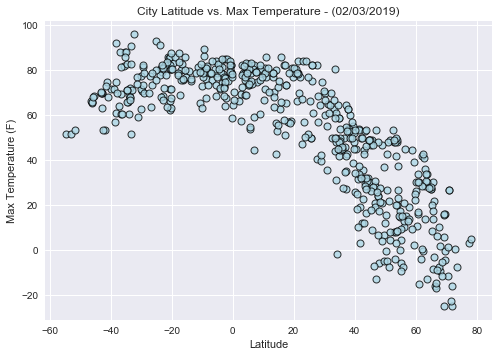

In [138]:
#Plot temp in F
#use seaborn for pretty plotting
plt.style.use('seaborn')

plt.scatter(weather_py["Lat"],weather_py["Max Temp"], edgecolor = "black", 
            linewidths =1, color = "lightblue", marker="o", alpha = 0.8)

plt.title(f"City Latitude vs. Max Temperature - ({analysis_date})")
plt.xlabel(f"Latitude")
plt.ylabel(f"Max Temperature (F)")
plt.grid(True)


#Save figure as png
plt.savefig("../Images/latitude_vs_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

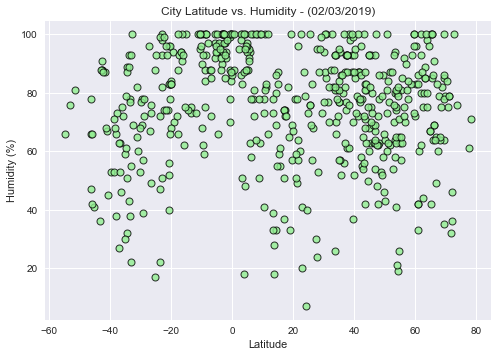

In [139]:
#use seaborn for pretty plotting
#plt.style.use('seaborn')

plt.scatter(weather_py["Lat"],weather_py["Humidity"], edgecolor = "black", 
            linewidths =1, marker="o", alpha = 0.8, color = "lightgreen")          
      
plt.title(f"City Latitude vs. Humidity - ({analysis_date})")
plt.xlabel(f"Latitude")
plt.ylabel(f"Humidity (%)")
plt.grid(True)


#Save figure as png
plt.savefig("../Images/latitude_vs_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

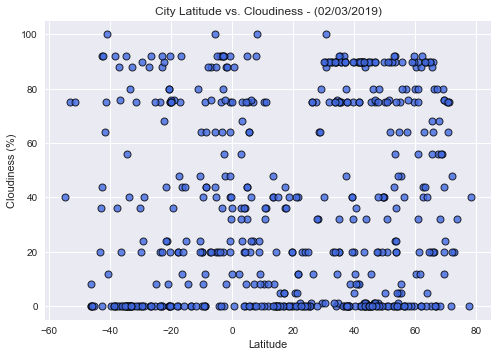

In [140]:
#use seaborn for pretty plotting
#plt.style.use('seaborn')

plt.scatter(weather_py["Lat"],weather_py["Cloudiness"], edgecolor = "black", 
            linewidths =1, marker="o", color = "royalblue", alpha = 0.8)
plt.title(f"City Latitude vs. Cloudiness - ({analysis_date})")
plt.xlabel(f"Latitude")
plt.ylabel(f"Cloudiness (%)")
plt.grid(True)


#Save figure as png
plt.savefig("../Images/latitude_vs_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

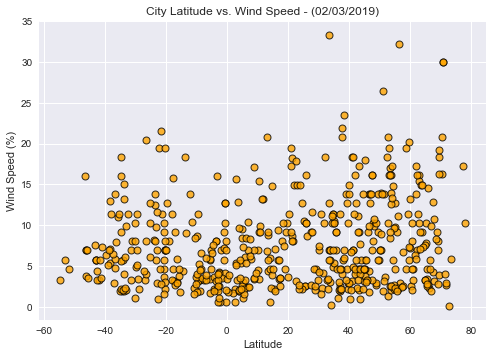

In [141]:
plt.scatter(weather_py["Lat"],weather_py["Wind Speed"], edgecolor = "black", 
            linewidths =1, marker="o", color = "orange", alpha = 0.8)
plt.title(f"City Latitude vs. Wind Speed - ({analysis_date})")
plt.xlabel(f"Latitude")
plt.ylabel(f"Wind Speed (%)")
plt.grid(True)


#Save figure as png
plt.savefig("../Images/latitude_vs_wind_speed.png")
plt.show()